### LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"

### LGMVIP July-22

### AUTHOR - Bhargavi Karri

### Advanced Level Task

### TASK-4- Develop A Neural Network That Can Read Handwriting 

Begin my neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners.

### Dataset link : https://en.wikipedia.org/wiki/MNIST_database

In [ ]:
### Importing Libraries

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [9]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

### plotting count plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

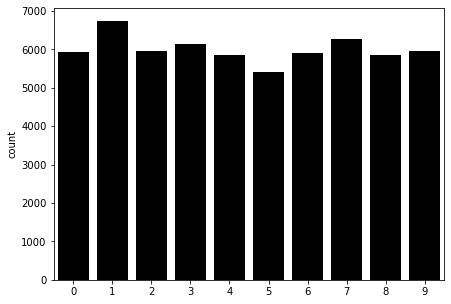

In [55]:
plt.figure(figsize = (7,5))
sn.countplot(y_train,color = 'black')

### Displaying some images

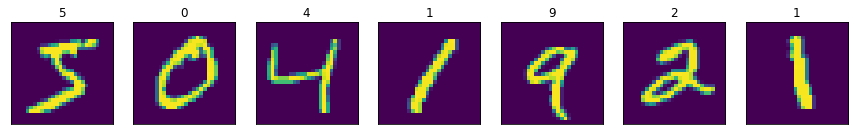

In [11]:
### Dataset properties
fig,axes = plt.subplots(ncols=7,sharex=False,
                       sharey=True,figsize=(15,5))
for i in range(7):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i],cmap='viridis')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [12]:
### preprocessing the data
print('Training data shape : ',x_train.shape)
print('Testing data shape : ',x_test.shape)

Training data shape :  (60000, 28, 28)
Testing data shape :  (10000, 28, 28)


In [13]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [14]:
#applying normalization
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

### creating the model

In [15]:
### model architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [17]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3),activation=tf.nn.relu,input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))
          
model.add(Conv2D(32,(3,3),activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))   

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))          

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization_3 (Batc  (None, 26, 26, 128)      512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 26, 26, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_4 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 24, 24, 64)       

### Training the model

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1688/1688 [==============================] - 331s 195ms/step - loss: 0.2626 - accuracy: 0.9226 - val_loss: 0.0852 - val_accuracy: 0.9805
Epoch 2/10
1688/1688 [==============================] - 322s 191ms/step - loss: 0.1130 - accuracy: 0.9674 - val_loss: 0.0749 - val_accuracy: 0.9827
Epoch 3/10
1688/1688 [==============================] - 315s 187ms/step - loss: 0.0862 - accuracy: 0.9749 - val_loss: 0.0940 - val_accuracy: 0.9830
Epoch 4/10
1688/1688 [==============================] - 329s 195ms/step - loss: 0.0757 - accuracy: 0.9779 - val_loss: 0.0835 - val_accuracy: 0.9850
Epoch 5/10
1688/1688 [==============================] - 370s 219ms/step - loss: 0.0623 - accuracy: 0.9820 - val_loss: 0.1669 - val_accuracy: 0.9753
Epoch 6/10
1688/1688 [==============================] - 375s 222ms/step - loss: 0.0561 - accuracy: 0.9836 - val_loss: 0.1561 - val_accuracy: 0.9743
Epoch 7/10
1688/1688 [==============================] - 371s 220ms/step - loss: 0.0491 - accuracy: 0.9851 - val_

### Plotting Training & Validation plots

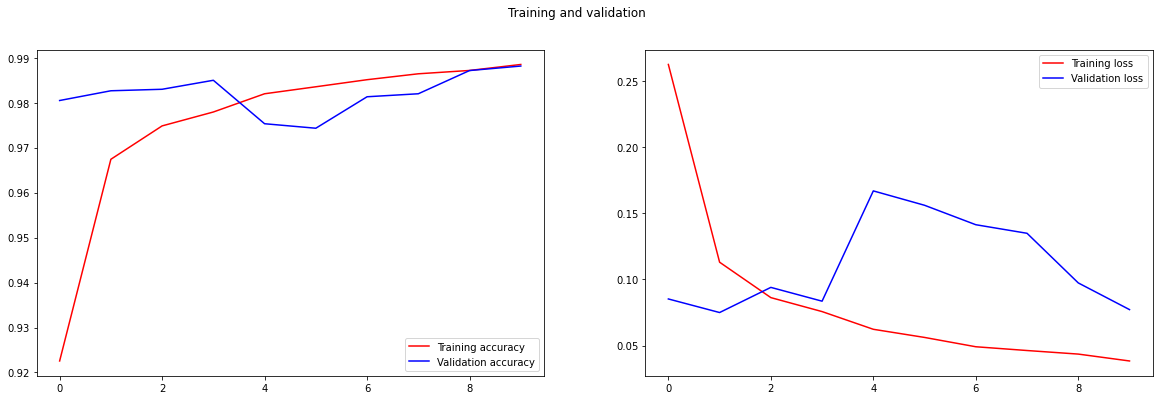

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'r', label='Training loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

### Evaluating the model

In [21]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 11s 35ms/step - loss: 3.8638 - accuracy: 0.9850
Test Loss 3.863802671432495
Test Accuracy 0.9850000143051147


### Testing the model

313/313 [==============================] - 7s 23ms/step
Predicted Value:  6
Successful prediction


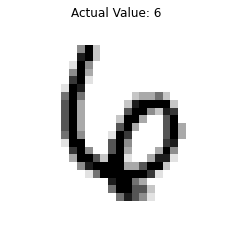

In [51]:
plt.imshow(x_test[22],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[22]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[22]))
if(y_test[22]==(np.argmax(prediction[22]))):
     print('Successful prediction')
else:
     print('Unsuccessful prediction')

313/313 [==============================] - 8s 25ms/step
Predicted Value:  9
Successful prediction


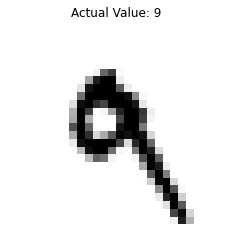

In [52]:
plt.imshow(x_test[7],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[7]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[7]))
if(y_test[7]==(np.argmax(prediction[7]))):
    print('Successful prediction')
else:
    print('Unsuccessful prediction')

### Thank You